In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("iris(1).csv")
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
pd.get_dummies(df)

,sepal_length,sepal_width,petal_length,petal_width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [3]:
import patsy
response,predictors=patsy.dmatrices('variety~sepal_length+sepal_width+petal_length+petal_width+0',data=df)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(predictors,response,random_state=0)


In [84]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(112, 3)
(112, 4)
(38, 3)
(38, 4)


In [93]:
import torch
y=torch.from_numpy(y_train)
X=torch.from_numpy(X_train)
X = X.to(torch.float32)
y = y.to(torch.float32)
test_y=torch.from_numpy(y_test)
test_X=torch.from_numpy(X_test)
test_X = test_X.to(torch.float32)
test_y = test_y.to(torch.float32)

In [74]:
print(X.shape)
print(y.shape)

torch.Size([112, 4])
torch.Size([15, 1])


In [99]:
import torch.nn as nn
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1=nn.Linear(4,200)
        self.fc2=nn.ReLU()
        self.fc3=nn.Linear(200,3)
    def forward(self,x):
        out=self.fc1(x)
        out=self.fc2(out)
        out=self.fc3(out)
        return(out)
mynet=net()


In [101]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(mynet.parameters(),lr=0.01)

In [102]:
y.shape

torch.Size([112, 3])

In [103]:
for epoch in range(600):
    outputs=mynet(X)
    loss=criterion(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [104]:
_,predicted = torch.max(mynet(test_X), 1)

In [112]:
correct=0
# for _ in range(38):
correct += (predicted == torch.max(test_y,1)[1]).sum().item()

In [113]:
correct

35

第二问

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("housing_renamed.csv")
print(df.shape)
df.head()
df.dropna(inplace=True)
list(df.columns)

(2626, 13)


['neighborhood',
 'type',
 'units',
 'year_built',
 'sq_ft',
 'income',
 'income_per_sq_ft',
 'expense',
 'expense_per_sq_ft',
 'net_income',
 'value',
 'value_per_sq_ft',
 'boro']

In [2]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
import patsy
response,predictors=patsy.dmatrices('value_per_sq_ft~neighborhood+type+units+year_built+sq_ft+income+income_per_sq_ft+expense+expense_per_sq_ft+net_income+value+boro+0',data=df)
# response=ss.fit_transform(response)
predictors=ss.fit_transform(predictors)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(predictors,response,random_state=0)


In [3]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
train_size=1897
batch_size=300
iter_per_epoch=max(train_size//batch_size,1)

(1897, 1)
(1897, 164)
(633, 1)
(633, 164)


In [5]:
import torch
device=torch.device('cuda')
y=torch.from_numpy(y_train)
X=torch.from_numpy(X_train)
X = X.to(torch.float32).to(device)
y = y.to(torch.float32).to(device)
test_y=torch.from_numpy(y_test)
test_X=torch.from_numpy(X_test)
test_X = test_X.to(torch.float32).to(device)
test_y = test_y.to(torch.float32).to(device)

In [8]:
X.to(device)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.5745, 0.0546, 0.0561],
        [0.0000, 0.0000, 0.0000,  ..., 0.5521, 0.1256, 0.1236],
        [0.0000, 0.0000, 0.0000,  ..., 0.6186, 0.2885, 0.2952],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5006, 0.0264, 0.0267],
        [0.0000, 0.0000, 0.0000,  ..., 0.7464, 0.0297, 0.0300],
        [0.0000, 0.0000, 0.0000,  ..., 0.4431, 0.0262, 0.0262]],
       device='cuda:0')

In [35]:
import torch.nn as nn
import torch.nn.functional as F
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1=nn.Linear(164,2000)
        self.fc11=nn.ReLU()
        self.fc2=nn.Linear(2000,2000)
        self.fc22=nn.ReLU()
        self.fc3=nn.Linear(2000,1)
    def forward(self,x):
        out=self.fc1(x)
        out=self.fc11(out)
        out=self.fc2(out)
        out=self.fc22(out)
        out=self.fc3(out)
        # out=F.softmax(out)
        return(out)
mynet=net().to(device)


In [216]:
cin=mynet(X)
nn.Softmax(cin)

C:\Users\zyc\AppData\Local\Temp\ipykernel_11992\718216199.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out=self.fc55(out)


Softmax(
  dim=tensor([[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
)

In [8]:
import torch.nn as nn
import torch.nn.functional as F
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1=nn.Linear(164,700)
        self.fc11=nn.ReLU()
        self.fc2=nn.Linear(700,700)
        self.fc22=nn.ReLU()
        self.fc3=nn.Linear(700,700)
        self.fc33=nn.ReLU()
        self.fc4=nn.Linear(700,700)
        self.fc44=nn.ReLU()
        self.fc5=nn.Linear(700,700)
        self.fc55=nn.ReLU()
        self.fc6=nn.Linear(700,700)
        self.fc66=nn.ReLU()
        self.fc7=nn.Linear(700,700)
        self.fc77=nn.ReLU()
        self.fc8=nn.Linear(700,700)
        self.fc88=nn.ReLU()
        self.fc9=nn.Linear(700,1)
        
    def forward(self,x):
        out=self.fc1(x)
        out=self.fc11(out)
        out=self.fc2(out)
        out=self.fc22(out)
        out=self.fc3(out)
        out=self.fc33(out)
        out=self.fc4(out)
        out=self.fc44(out)
        out=self.fc5(out)
        out=self.fc55(out)
        out=self.fc6(out)
        out=self.fc66(out)
        out=self.fc7(out)
        out=self.fc77(out)
        out=self.fc8(out)
        out=self.fc88(out)
        out=self.fc9(out)
        return(out)
mynet=net().to(device)


In [36]:
mynet(X)

tensor([[-0.0292],
        [-0.0283],
        [-0.0285],
        ...,
        [-0.0267],
        [-0.0294],
        [-0.0290]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [37]:
# criterion=nn.SmoothL1Loss()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(mynet.parameters(),lr=0.001)

In [38]:
loss_list=[]
test_loss=[]
for i in range(1000):
    batch_mask=np.random.choice(train_size,batch_size)
    X_batch=X[batch_mask]
    y_batch=y[batch_mask]
    outputs=mynet(X_batch)
    loss=criterion(outputs,y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    if i%iter_per_epoch==0:
        test_loss.append(criterion(mynet(test_X),test_y).item())

In [39]:
criterion(mynet(X),y)

tensor(138.0864, device='cuda:0', grad_fn=<MseLossBackward0>)

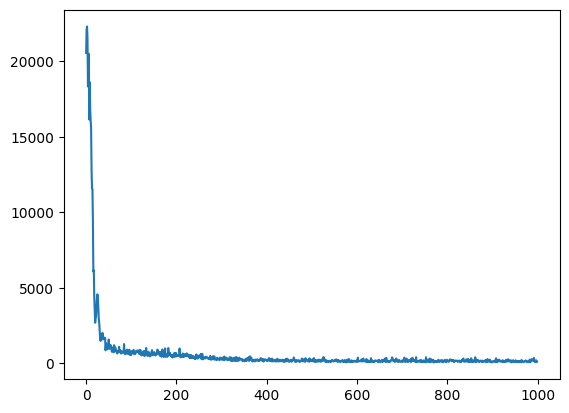

In [40]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

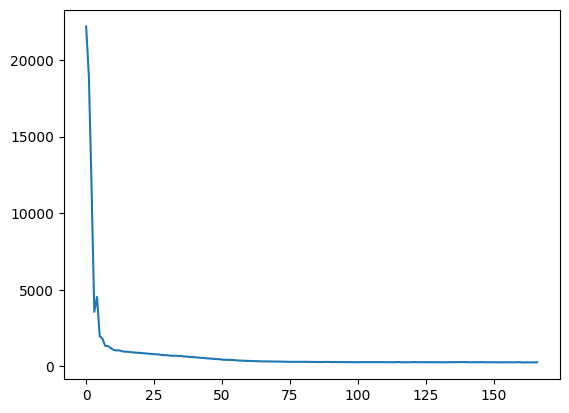

In [41]:
import matplotlib.pyplot as plt
plt.plot(test_loss)

In [42]:
min(test_loss)

245.06346130371094

In [116]:
mynet(X)

tensor([[218.5006],
        [110.4129],
        [248.7522],
        ...,
        [165.5020],
        [142.4770],
        [ 90.2684]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [117]:
y

tensor([[225.2900],
        [112.5300],
        [254.0800],
        ...,
        [171.6400],
        [146.0300],
        [ 91.2300]], device='cuda:0')

In [118]:
min(loss_list)

1.6900272369384766

In [127]:
mynet(test_X)


tensor([[178.3064],
        [103.9309],
        [ 71.9001],
        [118.8804],
        [ 52.3011],
        [ 84.9805],
        [211.5675],
        [ 60.3873],
        [248.3608],
        [ 64.1940],
        [ 89.7607],
        [217.0122],
        [ 90.2988],
        [ 54.5571],
        [ 73.6015],
        [252.3165],
        [217.1869],
        [163.8883],
        [ 68.7505],
        [174.7358],
        [206.5154],
        [106.1586],
        [ 75.8244],
        [188.5768],
        [131.5389],
        [ 75.3446],
        [188.8250],
        [178.5805],
        [215.9977],
        [ 55.0162],
        [ 80.9481],
        [176.6434],
        [ 85.9337],
        [173.9392],
        [ 88.2381],
        [243.1702],
        [ 81.2886],
        [ 66.4790],
        [159.0235],
        [209.9034],
        [179.2996],
        [ 53.4280],
        [ 90.9549],
        [ 85.1420],
        [ 70.9587],
        [157.9586],
        [201.5415],
        [ 84.6570],
        [174.0234],
        [199.4026],


In [121]:
test_y

tensor([[177.3400],
        [ 98.1700],
        [ 72.3500],
        [117.5300],
        [ 52.4200],
        [ 88.9900],
        [213.6200],
        [ 57.6000],
        [250.0400],
        [ 68.7200],
        [ 98.4700],
        [222.0000],
        [ 89.9000],
        [ 79.5400],
        [ 71.7700],
        [250.3700],
        [216.7400],
        [169.2600],
        [ 65.3400],
        [166.6600],
        [205.4100],
        [105.8200],
        [ 72.9500],
        [209.2900],
        [130.9200],
        [ 72.3500],
        [179.7200],
        [181.8300],
        [213.9000],
        [ 54.1200],
        [ 79.5000],
        [152.7700],
        [ 81.7300],
        [163.0000],
        [105.6300],
        [242.9400],
        [ 80.5900],
        [ 65.1000],
        [163.1600],
        [215.6100],
        [180.0600],
        [ 57.7300],
        [ 98.6900],
        [ 86.5200],
        [ 65.9500],
        [163.2100],
        [173.9700],
        [ 67.1900],
        [180.3900],
        [197.7800],
